# Project: *Mobile Price Prediction*
# Information:
In this Project, we have the mobiles description and our aim is finding the price range for each mobile.
# My data:
 1. id: ID
 2. battery_power: Total energy a battery can store in one time measured in mAh
 3. blue: Has bluetooth or not
 4. clock_speed: Speed at which microprocessor executes instructions
 5. dual_sim: Has dual sim support or not
 6. fc: Front Camera mega pixels
 7. four_g: Has 4G or not
 8. int_memory: Internal Memory in Gigabytes
 9. m_dep: Mobile Depth in cm
 10. mobile_wt: Weight of mobile phone
 11. n_cores: Number of cores of processor
 12. pc: Primary Camera mega pixels
 13. px_height: Pixel Resolution Height
 14. px_width: Pixel Resolution Width
 15. ram: Random Access Memory in Megabytes
 16. sc_h: Screen Height of mobile in cm
 17. sc_w: Screen Width of mobile in cm
 18. talk_time: Longest time that a single battery charge will last when you are
 19. three_g: Has 3G or not
 20. touch_screen: Has touch screen or not
 21. wifi: Has wifi or not
# Taget:
This kind of prediction will help companies estimate price of mobiles to give tough competion to other mobile manufacturer.  
Also it will be usefull for Consumers to verify that they are paying best price for a mobile.
# The models include:
 1. SVM
 2. Logistic Regression
 3. KNN
 4. Decision Tree
 5. Random Forest

In [54]:
# used for manipulating directory paths
import os

# Displaying the data
import pandas as pd

# Plotting library
from matplotlib import pyplot

# Scientific and vector computation for python
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [55]:
# Load data
train_file = os.path.join('Data', 'train.csv')

train_data = np.genfromtxt(train_file, delimiter=',', dtype=None, names=True, encoding=None)

# Display the data
train_pd = pd.read_csv('Data/train.csv')
train_table = pd.DataFrame(train_pd)

train_table

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


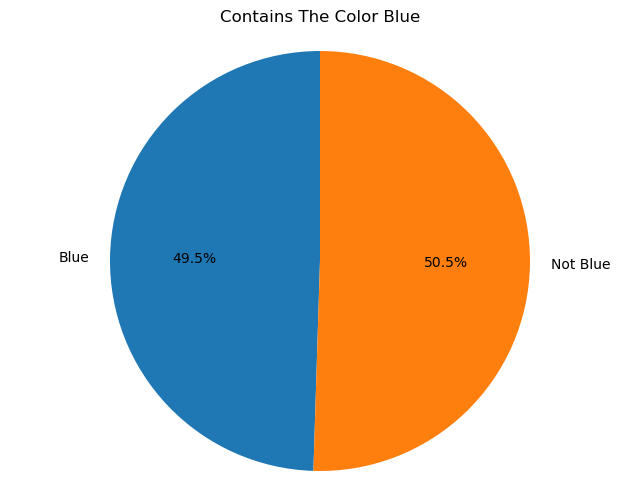

In [56]:
blue = train_data["blue"]
count_1 = np.sum(blue == 1)
count_0 = np.sum(blue == 0)

labels = ["Blue", "Not Blue"]
sizes = [count_1, count_0]

# Create a pie chart
pyplot.figure(figsize=(8, 6))
pyplot.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
pyplot.axis('equal')
pyplot.title('Contains The Color Blue')

# Show the plot
pyplot.show()

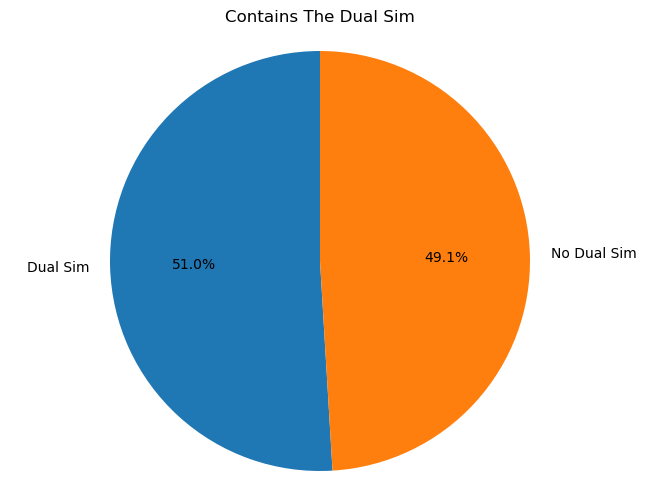

In [57]:
dual_sim = train_data["dual_sim"]
count_1 = np.sum(dual_sim == 1)
count_0 = np.sum(dual_sim == 0)

labels = ["Dual Sim", "No Dual Sim"]
sizes = [count_1, count_0]

# Create a pie chart
pyplot.figure(figsize=(8, 6))
pyplot.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
pyplot.axis('equal')
pyplot.title('Contains The Dual Sim')

# Show the plot
pyplot.show()

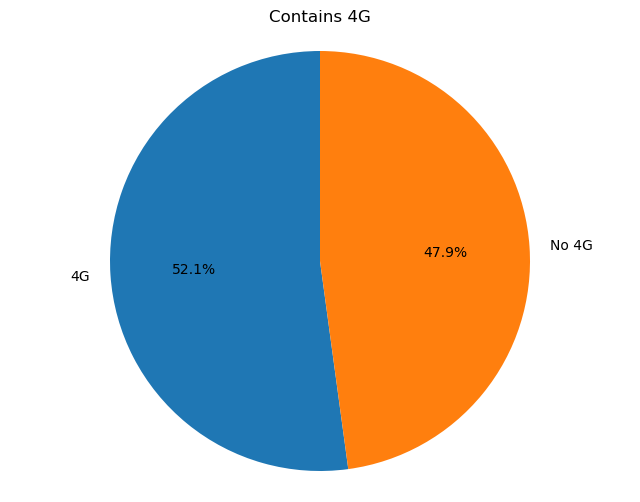

In [58]:
four_g = train_data["four_g"]
count_1 = np.sum(four_g == 1)
count_0 = np.sum(four_g == 0)

labels = ["4G", "No 4G"]
sizes = [count_1, count_0]

# Create a pie chart
pyplot.figure(figsize=(8, 6))
pyplot.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
pyplot.axis('equal')
pyplot.title('Contains 4G')

# Show the plot
pyplot.show()

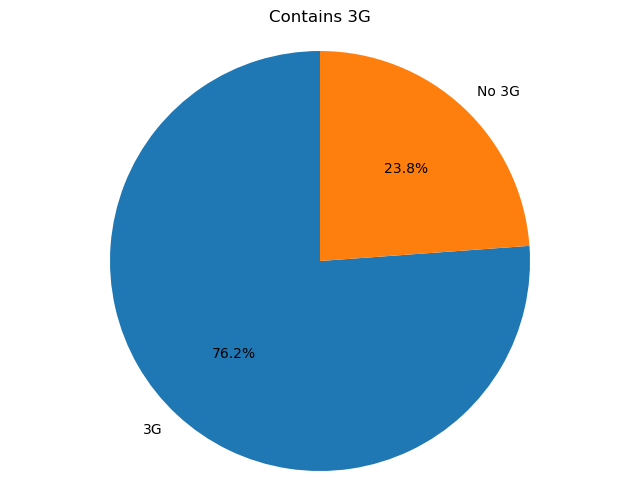

In [59]:
three_g = train_data["three_g"]
count_1 = np.sum(three_g == 1)
count_0 = np.sum(three_g == 0)

labels = ["3G", "No 3G"]
sizes = [count_1, count_0]

# Create a pie chart
pyplot.figure(figsize=(8, 6))
pyplot.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
pyplot.axis('equal')
pyplot.title('Contains 3G')

# Show the plot
pyplot.show()

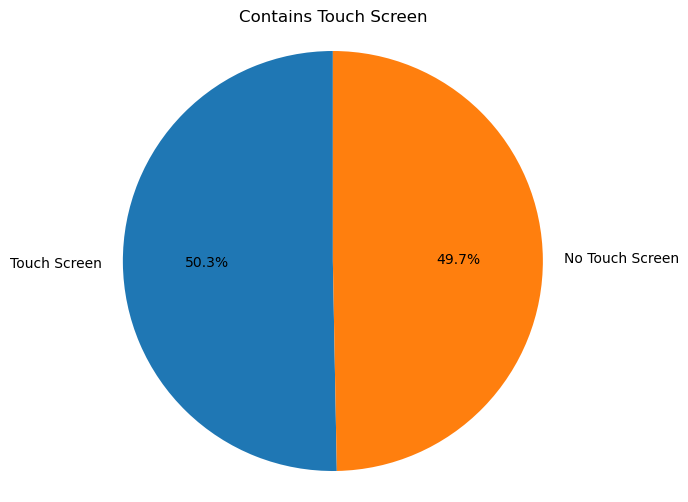

In [60]:
touch_screen = train_data["touch_screen"]
count_1 = np.sum(touch_screen == 1)
count_0 = np.sum(touch_screen == 0)

labels = ["Touch Screen", "No Touch Screen"]
sizes = [count_1, count_0]

# Create a pie chart
pyplot.figure(figsize=(8, 6))
pyplot.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
pyplot.axis('equal')
pyplot.title('Contains Touch Screen')

# Show the plot
pyplot.show()

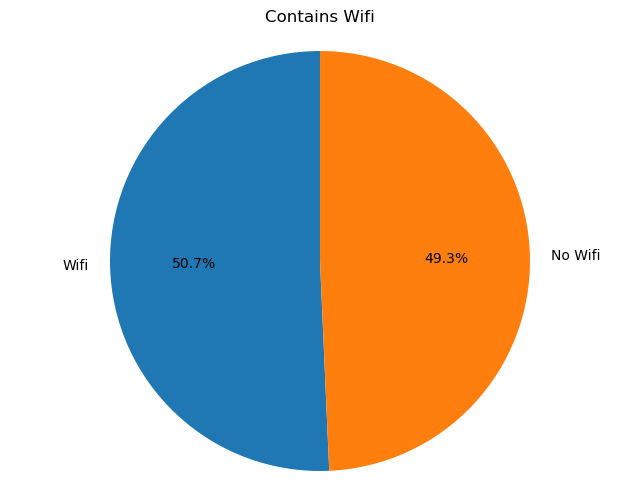

In [61]:
wifi = train_data["wifi"]
count_1 = np.sum(wifi == 1)
count_0 = np.sum(wifi == 0)

labels = ["Wifi", "No Wifi"]
sizes = [count_1, count_0]

# Create a pie chart
pyplot.figure(figsize=(8, 6))
pyplot.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
pyplot.axis('equal')
pyplot.title('Contains Wifi')

# Show the plot
pyplot.show()

[1 2 2 ... 3 0 3]


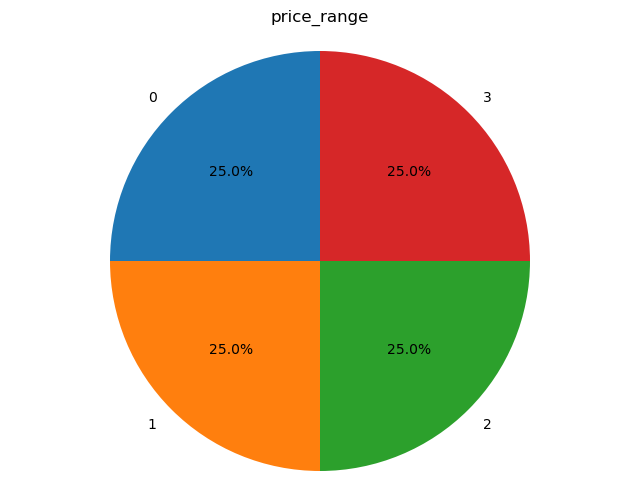

In [62]:
print(train_data["price_range"])
y_values = train_data["price_range"]
count_0 = np.sum(y_values == 0)
count_1 = np.sum(y_values == 1)
count_2 = np.sum(y_values == 2)
count_3 = np.sum(y_values == 3)

labels = ["0", "1", "2", "3"]
sizes = [count_0, count_1, count_2, count_3]

# Create a pie chart
pyplot.figure(figsize=(8, 6))
pyplot.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
pyplot.axis('equal')
pyplot.title('price_range')

# Show the plot
pyplot.show()

C:\Users\ahmad\AppData\Local\Temp\ipykernel_6440\3740810257.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  pyplot.boxplot(data.values(), labels=data.keys(), patch_artist=True)


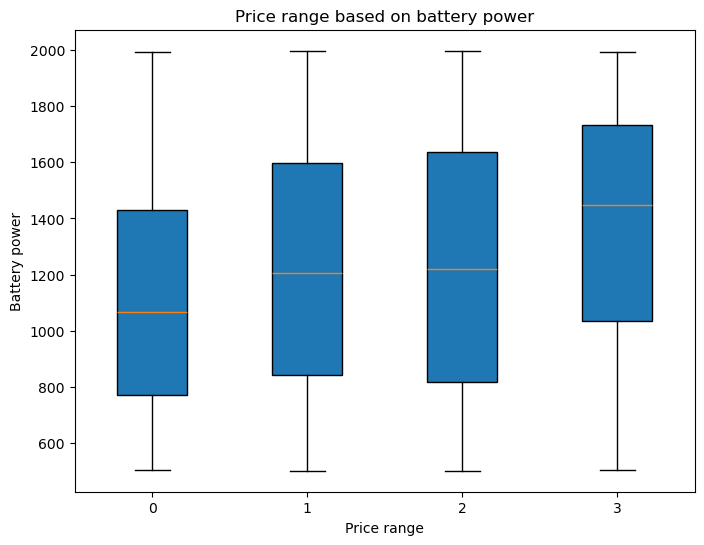

In [63]:
# Battery_power
battery_power = train_data["battery_power"]
price_range = train_data["price_range"]


data = {i: battery_power[price_range == i] for i in range(4)}

pyplot.figure(figsize=(8, 6))
pyplot.boxplot(data.values(), labels=data.keys(), patch_artist=True)

pyplot.xlabel('Price range')
pyplot.ylabel('Battery power')
pyplot.title('Price range based on battery power')
pyplot.show()

C:\Users\ahmad\AppData\Local\Temp\ipykernel_6440\2604828235.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  pyplot.boxplot(data.values(), labels=data.keys(), patch_artist=True)


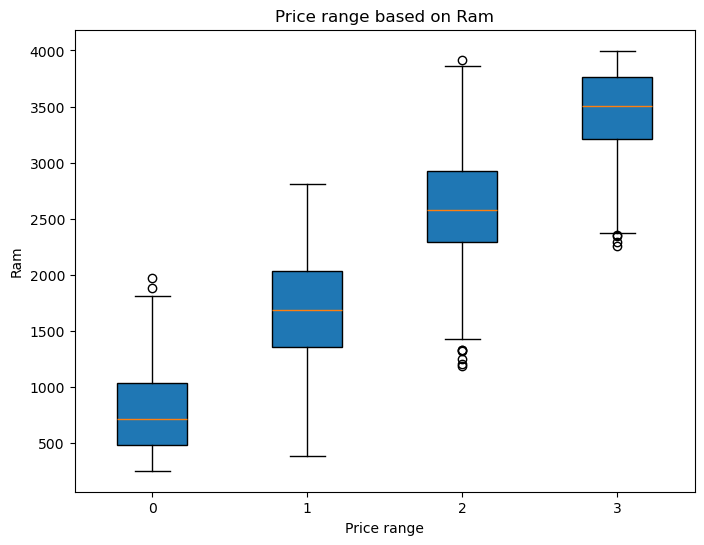

In [64]:
# Ram
ram = train_data["ram"]
price_range = train_data["price_range"]

data = {i: ram[price_range == i] for i in range(4)}

pyplot.figure(figsize=(8, 6))
pyplot.boxplot(data.values(), labels=data.keys(), patch_artist=True)

pyplot.xlabel('Price range')
pyplot.ylabel('Ram')
pyplot.title('Price range based on Ram')
pyplot.show()

C:\Users\ahmad\AppData\Local\Temp\ipykernel_6440\539581184.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  pyplot.boxplot(data.values(), labels=data.keys(), patch_artist=True)


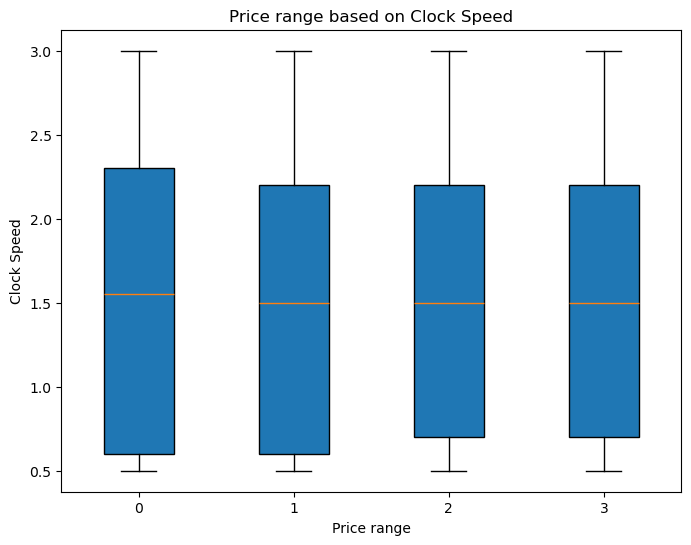

In [65]:
# clock Speed
clock_speed = train_data["clock_speed"]
price_range = train_data["price_range"]

data = {i: clock_speed[price_range == i] for i in range(4)}

pyplot.figure(figsize=(8, 6))
pyplot.boxplot(data.values(), labels=data.keys(), patch_artist=True)

pyplot.xlabel('Price range')
pyplot.ylabel('Clock Speed')
pyplot.title('Price range based on Clock Speed')

pyplot.show()

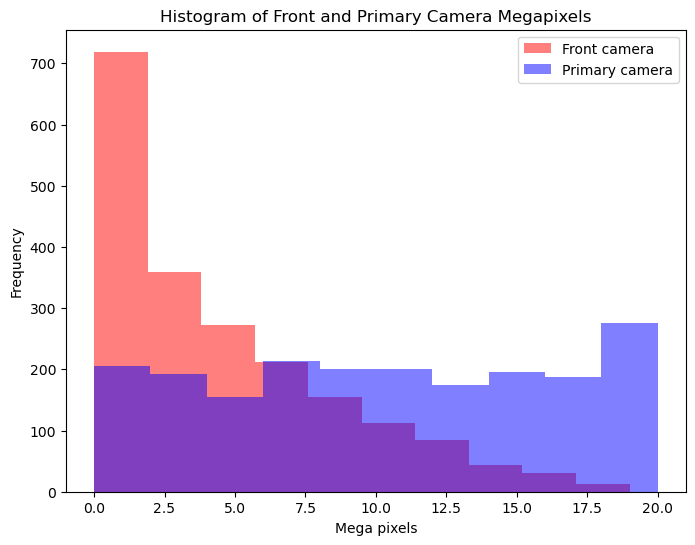

In [66]:
# clock Speed
primary_camera = train_data["pc"]
front_camera = train_data["fc"]
price_range = train_data["price_range"]

pyplot.figure(figsize=(8, 6))
pyplot.hist(front_camera, alpha=0.5,color='red',label='Front camera')
pyplot.hist(primary_camera, alpha=0.5,color='blue',label='Primary camera')

pyplot.legend()

pyplot.xlabel('Mega pixels')
pyplot.ylabel('Frequency')
pyplot.title('Histogram of Front and Primary Camera Megapixels')
pyplot.show()

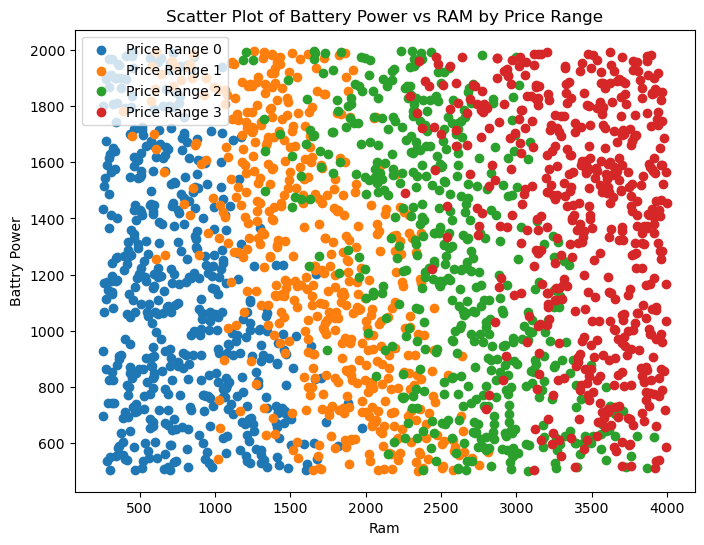

In [67]:
pyplot.figure(figsize=(8, 6))
for i in range(4):
    subset = train_data[train_data["price_range"] == i]
    pyplot.scatter(subset["ram"], subset["battery_power"], label=f'Price Range {i}')


pyplot.legend()

pyplot.xlabel('Ram')
pyplot.ylabel('Battry Power')
pyplot.title('Scatter Plot of Battery Power vs RAM by Price Range')
pyplot.show()

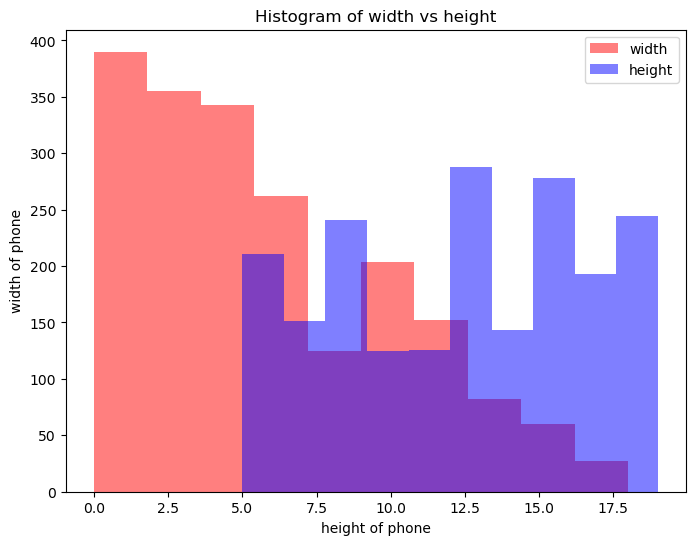

In [68]:
# Phone width vs height - Price Range
pyplot.figure(figsize=(8, 6))

pyplot.hist(train_data["sc_w"], alpha=0.5,color='red',label='width')
pyplot.hist(train_data["sc_h"], alpha=0.5,color='blue',label='height')

pyplot.legend()

pyplot.xlabel('height of phone')
pyplot.ylabel('width of phone')
pyplot.title('Histogram of width vs height')
pyplot.show()

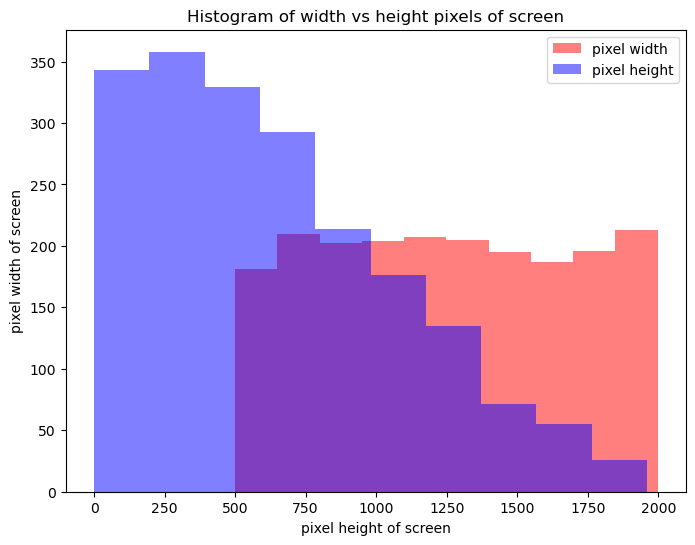

In [69]:
# Phone width pixel vs height pixel - Price Range
pyplot.figure(figsize=(8, 6))

pyplot.hist(train_data["px_width"], alpha=0.5,color='red',label='pixel width')
pyplot.hist(train_data["px_height"], alpha=0.5,color='blue',label='pixel height')

pyplot.legend()

pyplot.xlabel('pixel height of screen')
pyplot.ylabel('pixel width of screen')
pyplot.title('Histogram of width vs height pixels of screen')
pyplot.show()

# Models

In [70]:
# Import the data again to obtain the features and the target value.
train_data = np.genfromtxt(os.path.join('Data', 'train.csv'), delimiter=',')

# Remove the last element from each row and remove the text from each column
features = train_data[1:, :-1]
target_value = train_data[1:, 20]

X_train, X_test, y_train, y_test = train_test_split(features, target_value, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_test)

# Print the shape of the array to confirm
# print("Shape of data:", train_data.shape)
# print("Shape of features:", features.shape)
# print("Shape of target_value:", target_value.shape)

In [71]:
model_results = {
    'Model' : [],
    'Parameters' : [],
    'Accuracy' : [],
}

def add_model_result(name, params, accuracy):
    model_results['Model'].append(name)
    model_results['Parameters'].append(params)
    model_results['Accuracy'].append(accuracy)

## Logistic Regression

In [72]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()

logreg_cv = GridSearchCV(estimator=lr, cv=10, param_grid=parameters)
logreg_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [73]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy : {:.1f}%".format(logreg_cv.best_score_ * 100))
add_model_result('Logistic Regression', logreg_cv.best_params_, logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 95.4%


In [74]:
y_pred = logreg_cv.predict(X_val_scaled)
accuracy = accuracy_score(y_pred, y_test)
report = classification_report(y_pred, y_test)
print("Accuracy = {:.1f}%".format(accuracy * 100))
print("Report:", report)

Accuracy = 97.5%
Report:               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       101
         1.0       1.00      0.94      0.97        97
         2.0       0.95      0.99      0.97        88
         3.0       0.99      0.97      0.98       114

    accuracy                           0.97       400
   macro avg       0.97      0.98      0.97       400
weighted avg       0.98      0.97      0.97       400



## KNN Model

In [75]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

knn=KNeighborsClassifier()

knn_cv = GridSearchCV(estimator=knn, cv=10, param_grid=parameters)
knn_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [76]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy : {:.1f}%".format(knn_cv.best_score_ * 100))
add_model_result('K-Nearest Neighbour', knn_cv.best_params_, knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 57.1%


In [77]:
y_pred = knn_cv.predict(X_val_scaled)
accuracy = accuracy_score(y_pred, y_test)
report = classification_report(y_pred, y_test)
print("Accuracy = {:.1f}%".format(accuracy * 100))
print("Report:", report)

Accuracy = 58.0%
Report:               precision    recall  f1-score   support

         0.0       0.78      0.67      0.72       123
         1.0       0.43      0.45      0.44        86
         2.0       0.47      0.41      0.44       105
         3.0       0.61      0.79      0.69        86

    accuracy                           0.58       400
   macro avg       0.57      0.58      0.57       400
weighted avg       0.59      0.58      0.58       400



# SVM Model

In [80]:
parameters = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 1, 'scale', 'auto']
}

svm=SVC()

svm_cv = GridSearchCV(estimator=svm, cv=10, param_grid=parameters)
svm_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [81]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy : {:.1f}%".format(svm_cv.best_score_ * 100))
add_model_result('Support Vector Machine', svm_cv.best_params_, svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
accuracy : 95.9%


In [82]:
y_pred = svm_cv.predict(X_val_scaled)
accuracy = accuracy_score(y_pred, y_test)
report = classification_report(y_pred, y_test)
print("Accuracy = {:.1f}%".format(accuracy * 100))
print("Report:", report)

Accuracy = 97.0%
Report:               precision    recall  f1-score   support

         0.0       0.93      1.00      0.97        98
         1.0       1.00      0.90      0.95       101
         2.0       0.95      1.00      0.97        87
         3.0       1.00      0.98      0.99       114

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



## Decision Tree

In [83]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(estimator=tree, cv=10, param_grid=parameters)
tree_cv.fit(X_train_scaled, y_train)

D:\Anaconda\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\envs\gpu\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\gpu\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "D:\Anaconda\envs\gpu\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "D:\Anaconda\envs\gpu\lib\site-packages\sklearn\utils\

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [84]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy : {:.1f}%".format(tree_cv.best_score_ * 100))
add_model_result('Decision Tree Classifier', tree_cv.best_params_, tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 68.2%


In [85]:
y_pred = tree_cv.predict(X_val_scaled)
accuracy = accuracy_score(y_pred, y_test)
report = classification_report(y_pred, y_test)
print("Accuracy = {:.1f}%".format(accuracy * 100))
print("Report:", report)

Accuracy = 64.8%
Report:               precision    recall  f1-score   support

         0.0       0.76      0.77      0.77       104
         1.0       0.56      0.55      0.56        92
         2.0       0.63      0.53      0.58       109
         3.0       0.62      0.74      0.68        95

    accuracy                           0.65       400
   macro avg       0.64      0.65      0.64       400
weighted avg       0.65      0.65      0.65       400



## Random Forest

In [92]:
parameters = {
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9],
}

RF_tree = RandomForestClassifier()
RF_tree = GridSearchCV(estimator=RF_tree, cv=10, param_grid=parameters)
RF_tree.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [25, 50, 100, 150]})

In [93]:
print("tuned hpyerparameters :(best parameters) ",RF_tree.best_params_)
print("accuracy : {:.1f}%".format(RF_tree.best_score_ * 100))
add_model_result('Random Forest', RF_tree.best_params_, RF_tree.best_score_)

tuned hpyerparameters :(best parameters)  {'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': 9, 'n_estimators': 150}
accuracy : 83.7%


In [94]:
y_pred = RF_tree.predict(X_val_scaled)
accuracy = accuracy_score(y_pred, y_test)
report = classification_report(y_pred, y_test)
print("Accuracy = {:.1f}%".format(accuracy * 100))
print("Report:", report)

Accuracy = 86.2%
Report:               precision    recall  f1-score   support

         0.0       0.97      0.90      0.94       113
         1.0       0.76      0.79      0.78        87
         2.0       0.75      0.79      0.77        87
         3.0       0.94      0.93      0.93       113

    accuracy                           0.86       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.87      0.86      0.86       400



## Best model

In [122]:
df = pd.DataFrame.from_dict(data=model_results)
df = df.sort_values(by="Accuracy", ascending=False)
df['Accuracy'] = np.round(df['Accuracy'], 3) * 100
df

,Model,Parameters,Accuracy
2,Support Vector Machine,"{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}",95.9
0,Logistic Regression,"{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}",95.4
4,Random Forest,"{'max_depth': 6, 'max_features': 'sqrt', 'max_...",83.7
3,Decision Tree Classifier,"{'criterion': 'entropy', 'max_depth': 16, 'max...",68.2
1,K-Nearest Neighbour,"{'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}",57.1


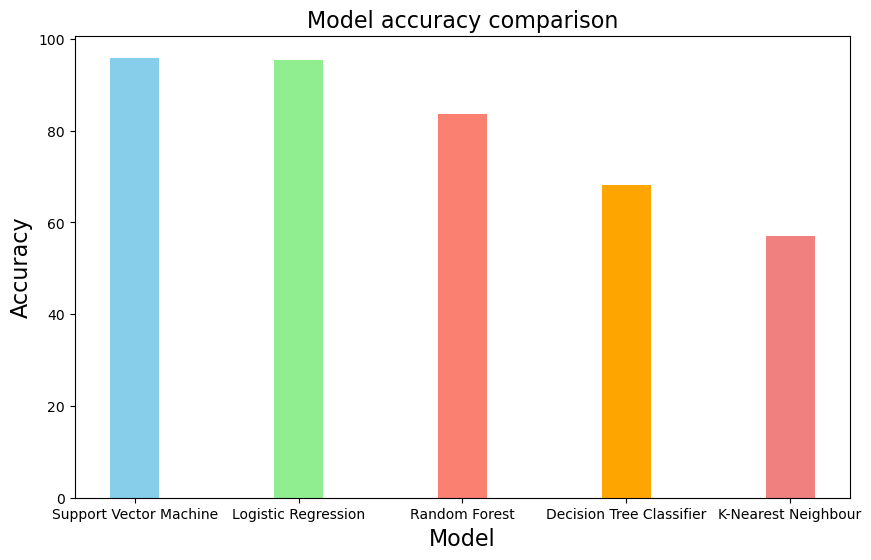

In [143]:
pyplot.figure(figsize=(10, 6))
colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'lightcoral']

# Bar plot
# df.plot.barh(x='Model', y='Accuracy')
pyplot.bar(df['Model'], df['Accuracy'], width=0.3, color = colors)
pyplot.title("Model accuracy comparison", fontsize=16)
pyplot.xlabel("Model", fontsize=16)
pyplot.ylabel("Accuracy", fontsize=16)

pyplot.show()